<a href="https://colab.research.google.com/github/trevinofernando/2D-Tactical-Game/blob/master/hw2/Hw2Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion data set
Classification with dense layers

#Model that Underfits
The model is too simple and cannot explain the data.

## Loading the MNIST fashion data set

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Exploring the format of the MNIST fashion data set

In [70]:
train_images.shape

(60000, 28, 28)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

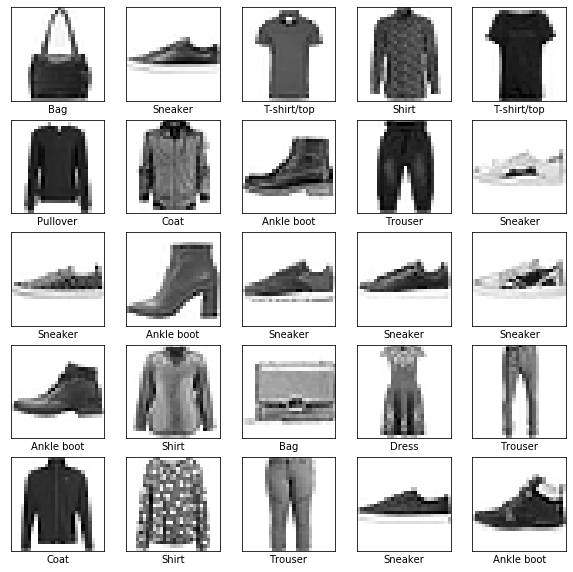

In [74]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[indices[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[indices[i]]])
plt.show()

## Preprocess the data

In [0]:
#Re-scale data to have a value between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

##Network Architecture

###Summary

In [75]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Input layer of 28*28 = 784 pixels
    keras.layers.Dense(10, activation=tf.nn.softmax) #Output layer with softmax for One Hot Encoding
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Build and train the model

In [76]:
# compile the model
model.compile(optimizer='rmsprop', #Root Mean Square Propogation
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5853 - acc: 0.8024 - val_loss: 0.5155 - val_acc: 0.8252
Epoch 2/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4707 - acc: 0.8432 - val_loss: 0.4847 - val_acc: 0.8386
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4508 - acc: 0.8492 - val_loss: 0.4921 - val_acc: 0.8370
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4409 - acc: 0.8547 - val_loss: 0.4855 - val_acc: 0.8391
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4351 - acc: 0.8566 - val_loss: 0.4845 - val_acc: 0.8407
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4298 - acc: 0.8582 - val_loss: 0.4828 - val_acc: 0.8417
Epoch 7/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4272 - acc: 0.8597 - val_loss: 0.

### Evaluate accuracy

In [77]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.4763 - acc: 0.8457
Test accuracy: 0.8457


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



##Visualization

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

### Training and Test Loss



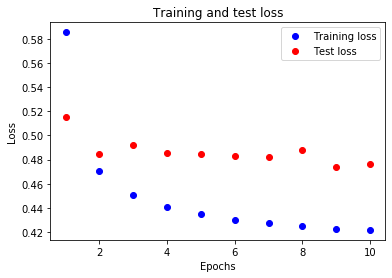

In [79]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and Test Accuracy

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

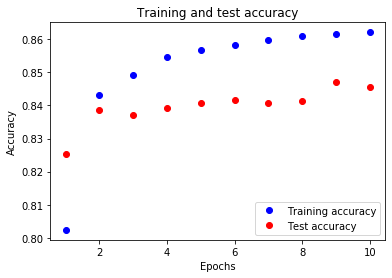

In [81]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Missclassified data

In [82]:
#Test model on Test dataset
predictions = model.predict([test_images])
#Get predictions by extracting the max on the One Hot Encoded Vector
predictions = np.argmax(predictions, axis=1) 
#Cast values to make sure it's uint8
predictions = predictions.astype('uint8')
print(predictions)

[9 2 1 ... 8 1 5]


In [83]:
(numLabels,) = test_labels.shape
#Compare predicted labels against real labels and extract the bad predictions
wrong_indices = [i for i in range(numLabels) if predictions[i] != test_labels[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
print(1.0 - len(wrong_indices) / numLabels)

0.8457


Predicted 
Sandal
True label 
Sneaker


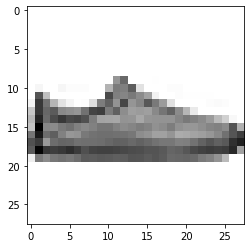

Predicted 
Shirt
True label 
Coat


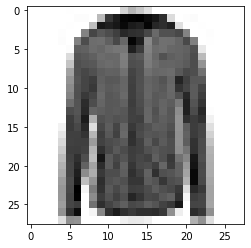

Predicted 
Coat
True label 
Pullover


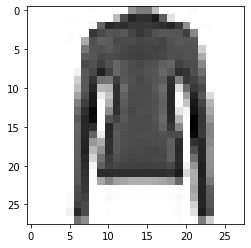

Predicted 
T-shirt/top
True label 
Dress


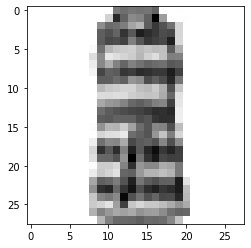

Predicted 
Coat
True label 
Shirt


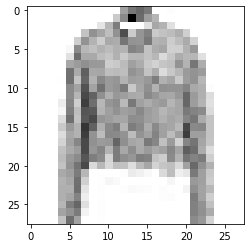

Predicted 
Shirt
True label 
Coat


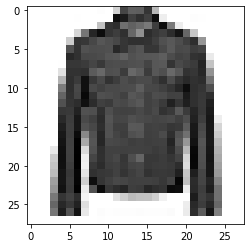

Predicted 
Pullover
True label 
Coat


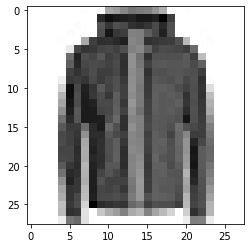

Predicted 
Pullover
True label 
Coat


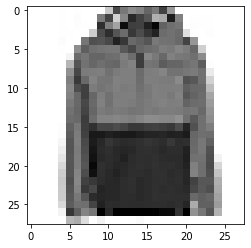

Predicted 
Coat
True label 
Pullover


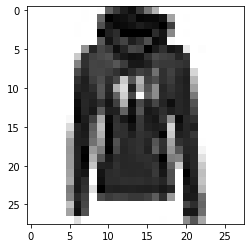

Predicted 
Shirt
True label 
Coat


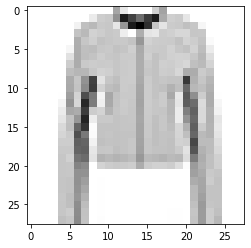

In [84]:
# This show the ith misclassified digit. 
numImages = 10
for i in range(numImages):
  wrong_index = wrong_indices[(int)(i * len(wrong_indices) / numImages)]
  print("Predicted ")
  print(class_names[predictions[wrong_index]])
  print("True label ")
  print(class_names[test_labels[wrong_index]])
  plt.imshow(test_images[wrong_index], cmap = plt.cm.binary)
  plt.show()

#Model that Overfits
The model is unnecessarily complex so it can easily adapt too much to the training data. In addition, the model tarins for too long, and having too much exposure to the same data will lead to Overfiting

## Loading the MNIST fashion data set

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

In [0]:
#Re-scale data to have a value between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

##Network Architecture

###Summary

In [88]:
# set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Input layer of 28*28 = 784 pixels
    keras.layers.Dense(784, activation=tf.nn.relu), #Hidden layer with 784 neurons and reLu(x) = max(0, x)
    keras.layers.Dense(784*2, activation=tf.nn.leaky_relu), #Hidden layer with 1568 neurons and leaky_reLu(x) = max(0.01x, x)
    keras.layers.Dense(784*2, activation=tf.nn.sigmoid), #Hidden layer with 1568 neurons and sigmoid(x) = 1/(1 + e^-x)
    keras.layers.Dense(10, activation=tf.nn.softmax) #Output layer with softmax for One Hot Encoding
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_12 (Dense)             (None, 1568)              1230880   
_________________________________________________________________
dense_13 (Dense)             (None, 1568)              2460192   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                15690     
Total params: 4,322,202
Trainable params: 4,322,202
Non-trainable params: 0
_________________________________________________________________


### Build and train the model

In [89]:
# compile the model
model.compile(optimizer='adam', #Adaptive Moment Optimization
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])

# train the model
epochs = 25
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 220us/sample - loss: 0.4970 - acc: 0.8189 - val_loss: 0.4242 - val_acc: 0.8530
Epoch 2/25
60000/60000 [==============================] - 13s 211us/sample - loss: 0.3677 - acc: 0.8644 - val_loss: 0.4229 - val_acc: 0.8462
Epoch 3/25
60000/60000 [==============================] - 13s 209us/sample - loss: 0.3317 - acc: 0.8774 - val_loss: 0.3838 - val_acc: 0.8598
Epoch 4/25
60000/60000 [==============================] - 13s 209us/sample - loss: 0.3102 - acc: 0.8843 - val_loss: 0.3745 - val_acc: 0.8717
Epoch 5/25
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2949 - acc: 0.8903 - val_loss: 0.3917 - val_acc: 0.8548
Epoch 6/25
60000/60000 [==============================] - 12s 208us/sample - loss: 0.2847 - acc: 0.8946 - val_loss: 0.3516 - val_acc: 0.8747
Epoch 7/25
60000/60000 [==============================] - 12s 208us/sample - loss: 0.2748 - acc: 0.8970 

### Evaluate accuracy

In [90]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 81us/sample - loss: 0.4181 - acc: 0.8633
Test accuracy: 0.8633


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



##Visualization

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

### Training and Test Loss



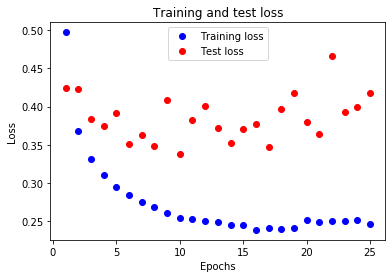

In [92]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and Test Accuracy

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

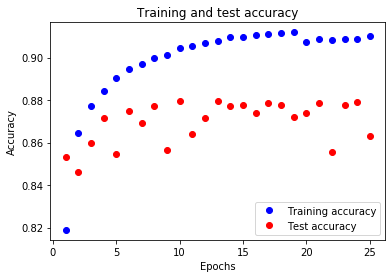

In [94]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Missclassified data

In [95]:
#Test model on Test dataset
predictions = model.predict([test_images])
#Get predictions by extracting the max on the One Hot Encoded Vector
predictions = np.argmax(predictions, axis=1) 
#Cast values to make sure it's uint8
predictions = predictions.astype('uint8')
print(predictions)

[9 2 1 ... 8 1 5]


In [96]:
(numLabels,) = test_labels.shape
#Compare predicted labels against real labels and extract the bad predictions
wrong_indices = [i for i in range(numLabels) if predictions[i] != test_labels[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
print(1.0 - len(wrong_indices) / numLabels)

0.8633


Predicted 
Sandal
True label 
Sneaker


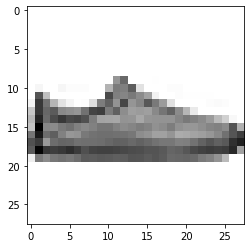

Predicted 
Shirt
True label 
T-shirt/top


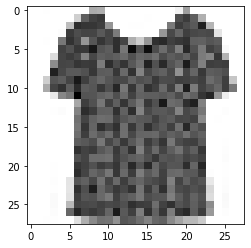

Predicted 
Dress
True label 
Pullover


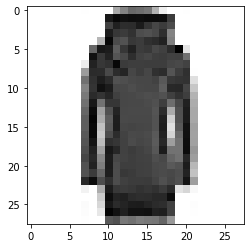

Predicted 
Sneaker
True label 
Ankle boot


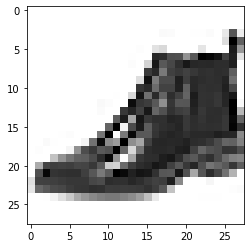

Predicted 
Shirt
True label 
Pullover


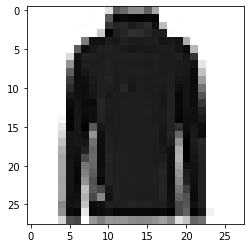

Predicted 
Shirt
True label 
Coat


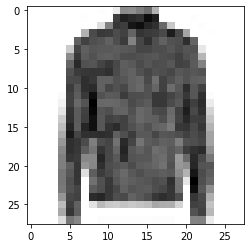

Predicted 
Shirt
True label 
Pullover


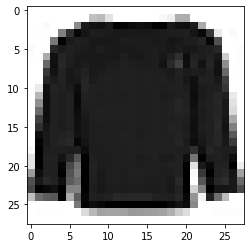

Predicted 
Pullover
True label 
Shirt


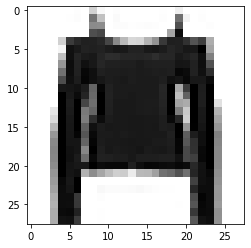

Predicted 
Dress
True label 
T-shirt/top


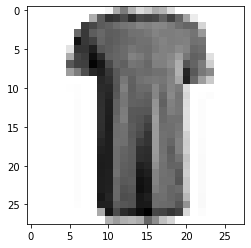

Predicted 
Dress
True label 
T-shirt/top


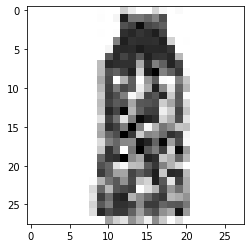

In [97]:
# This show the ith misclassified digit. 
numImages = 10
for i in range(numImages):
  wrong_index = wrong_indices[(int)(i * len(wrong_indices) / numImages)]
  print("Predicted ")
  print(class_names[predictions[wrong_index]])
  print("True label ")
  print(class_names[test_labels[wrong_index]])
  plt.imshow(test_images[wrong_index], cmap = plt.cm.binary)
  plt.show()

#Model that is "Pretty Good"
The model is neither too simple, nor too complex. In addition, the model didn't train for too many epochs, and I use dropout to fight overfitting.

## Loading the MNIST fashion data set

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

In [0]:
#Re-scale data to have a value between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

##Network Architecture

###Summary

In [59]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Input layer of 28*28 = 784 pixels
    keras.layers.Dropout(0.5), #50% chance of using a given neuron
    keras.layers.Dense(784, activation=tf.nn.relu), #Hidden layer with 784 neurons and reLu(x) = max(0, x)
    keras.layers.Dense(28, activation=tf.nn.sigmoid), #Hidden layer with 1568 neurons and sigmoid(x) = 1/(1 + e^-x)
    keras.layers.Dense(10, activation=tf.nn.softmax) #Output layer with softmax for One Hot Encoding
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                290       
Total params: 637,710
Trainable params: 637,710
Non-trainable params: 0
_________________________________________________________________


### Build and train the model

In [60]:
# compile the model
model.compile(optimizer='adam', #Adaptive Moment Optimization
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])

# train the model
epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 125us/sample - loss: 0.6494 - acc: 0.7810 - val_loss: 0.4805 - val_acc: 0.8282
Epoch 2/30
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4683 - acc: 0.8259 - val_loss: 0.4035 - val_acc: 0.8565
Epoch 3/30
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4278 - acc: 0.8405 - val_loss: 0.3952 - val_acc: 0.8563
Epoch 4/30
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4061 - acc: 0.8485 - val_loss: 0.3819 - val_acc: 0.8595
Epoch 5/30
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3904 - acc: 0.8530 - val_loss: 0.3695 - val_acc: 0.8637
Epoch 6/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3790 - acc: 0.8572 - val_loss: 0.3620 - val_acc: 0.8667
Epoch 7/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3701 - acc: 0.8599 - val_l

### Evaluate accuracy

In [61]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.3150 - acc: 0.8827
Test accuracy: 0.8827


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



##Visualization

### Training and Test Loss



In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

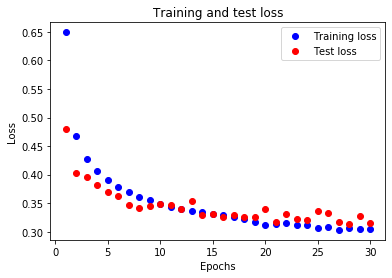

In [63]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and Test Accuracy

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

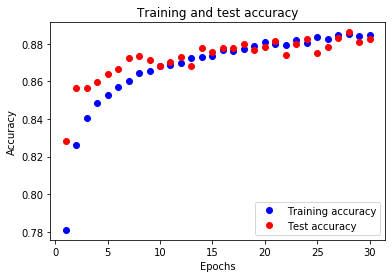

In [65]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Missclassified data

In [66]:
#Test model on Test dataset
predictions = model.predict([test_images])
#Get predictions by extracting the max on the One Hot Encoded Vector
predictions = np.argmax(predictions, axis=1) 
#Cast values to make sure it's uint8
predictions = predictions.astype('uint8')
print(predictions)

[9 2 1 ... 8 1 5]


In [67]:
(numLabels,) = test_labels.shape
#Compare predicted labels against real labels and extract the bad predictions
wrong_indices = [i for i in range(numLabels) if predictions[i] != test_labels[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
print(1.0 - len(wrong_indices) / numLabels)

0.8827


Predicted 
Sandal
True label 
Sneaker


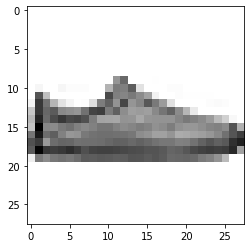

Predicted 
T-shirt/top
True label 
Shirt


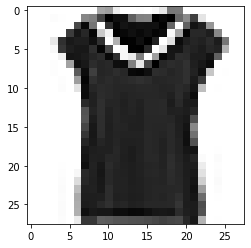

Predicted 
Dress
True label 
Trouser


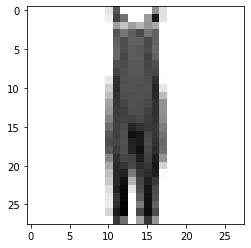

Predicted 
Shirt
True label 
T-shirt/top


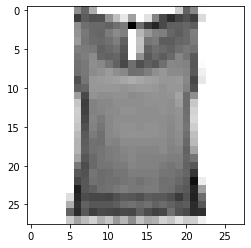

Predicted 
Dress
True label 
Coat


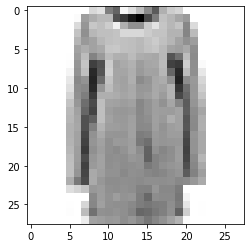

Predicted 
Shirt
True label 
Pullover


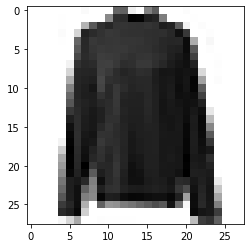

Predicted 
Shirt
True label 
Pullover


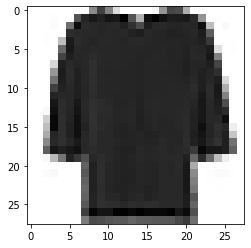

Predicted 
Shirt
True label 
T-shirt/top


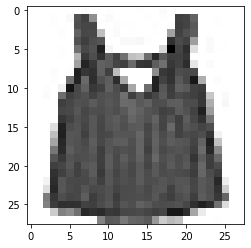

Predicted 
Ankle boot
True label 
Sandal


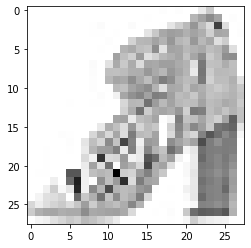

Predicted 
Shirt
True label 
Dress


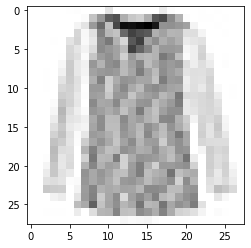

In [68]:
# This show the ith misclassified digit. 
numImages = 10
for i in range(numImages):
  wrong_index = wrong_indices[(int)(i * len(wrong_indices) / numImages)]
  print("Predicted ")
  print(class_names[predictions[wrong_index]])
  print("True label ")
  print(class_names[test_labels[wrong_index]])
  plt.imshow(test_images[wrong_index], cmap = plt.cm.binary)
  plt.show()